In [2]:
# importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split

import tensorflow as tf

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Exploratory Data Analysis

## Dog Breed Multi Class Classification

### 1.Problem
There are 120 breeds of dog in the data. We have to identify according to their breeds.
### 2. Data
There are training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs.
* train.zip - the training set, you are provided the breed for these dogs
* test.zip - the test set, you must predict the probability of each breed for each image
* sample_submission.csv - a sample submission file in the correct format
* labels.csv - the breeds for the images in the train set

### Evaluation
Observation on loss, accuracy, val-accuracy & loss-accuracy

### Features
* We are dealing with the unstructure dataset.
* 10000+ images available in the training data.
* 10000+ images available in the test data.

### Approach
* We will use VGG16 pre-trained model to observe relevant metrics.
* VGG16 is also a convolutional neural network. It is an image classification neural network that uses 3*3 filters one after the another.
* Here we can see model summary for VGG16




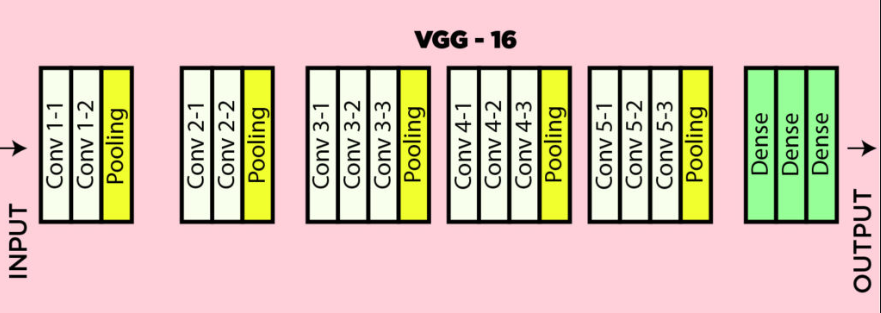


* Final approach's flow chart

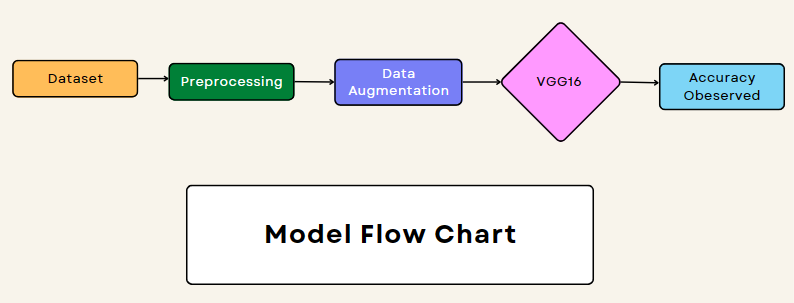

In [4]:
labels = pd.read_csv(r"C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\labels.csv")
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

Have loaded the image labels to the variable name 'labels'

In [5]:
# describe
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

Inside the Train folder we have 10222 unique labeled images and breed column have 120 breeds in total.

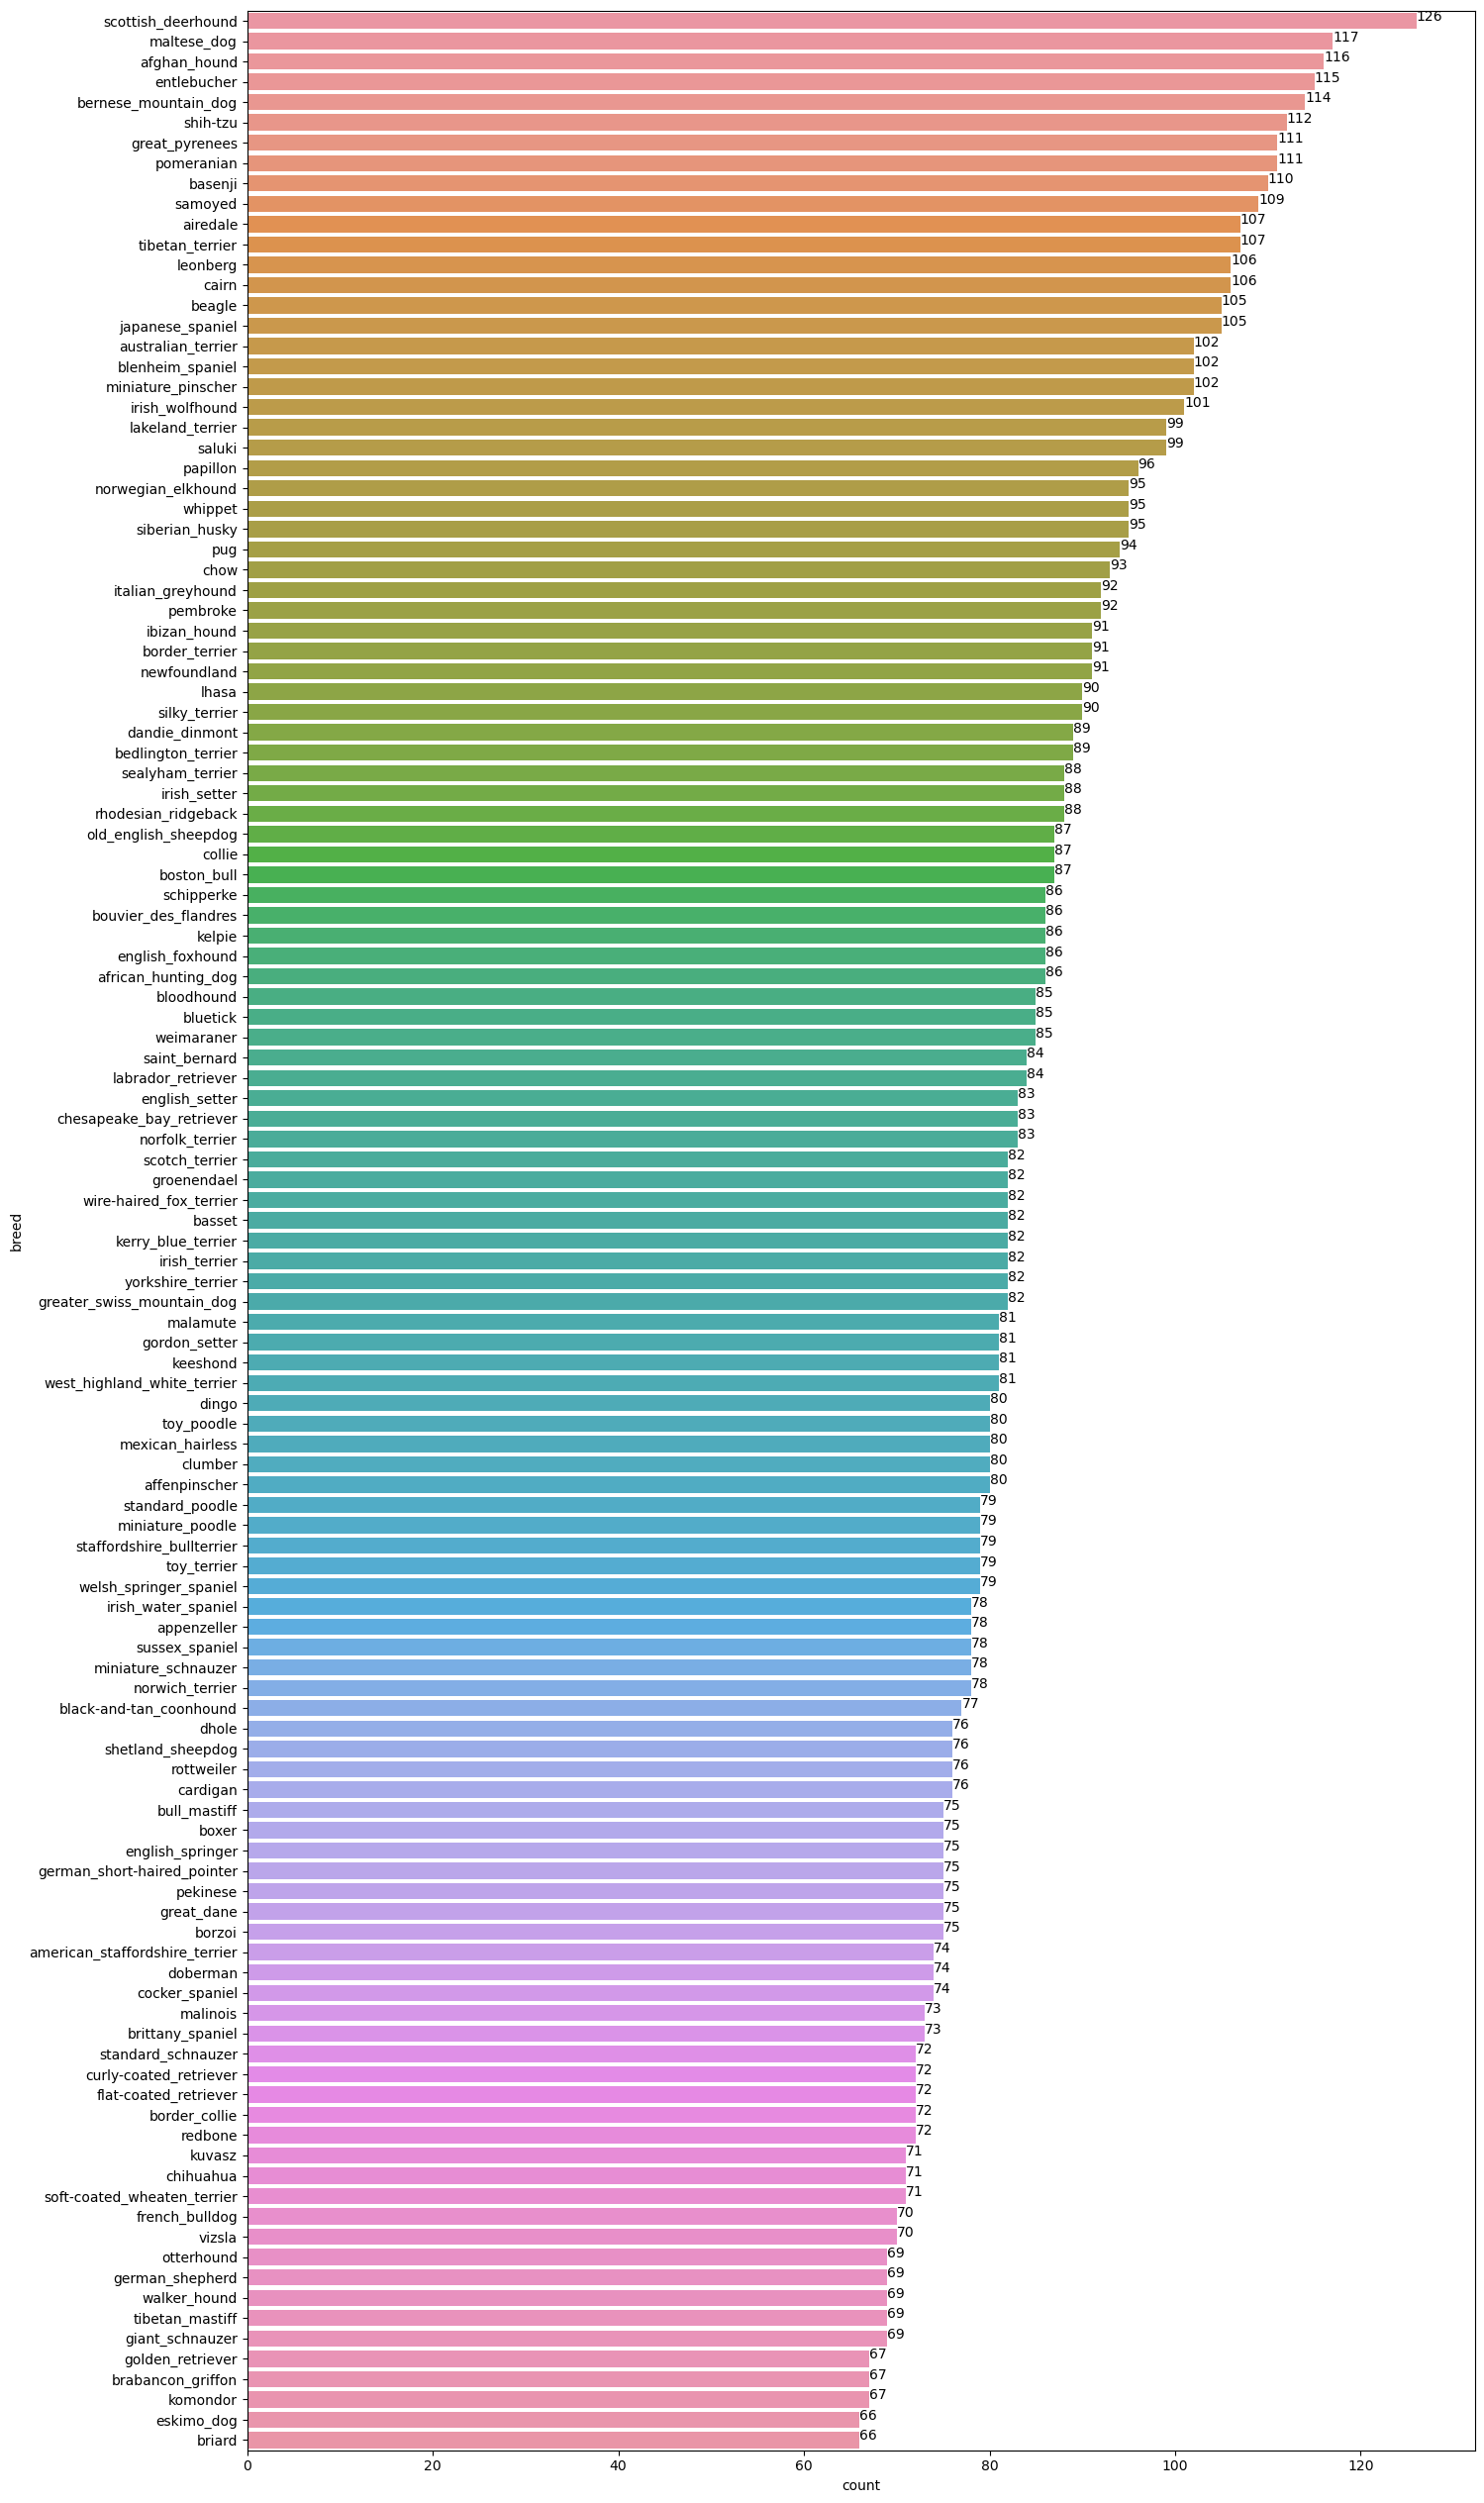

In [6]:
# Defining a function to visualize the breed frequency in the data

def show_frequency(axes):
    
    for i in axes.patches:
        val = i.get_width() #height of the bar
        x = i.get_x()+ i.get_width() # x- position 
        y = i.get_y() + i.get_height()/2 #y-position
        axes.annotate(round(val,2),(x,y))
        
# to breed frequency

plt.figure(figsize = (16,32))
axes =sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)
show_frequency(axes)
plt.show()

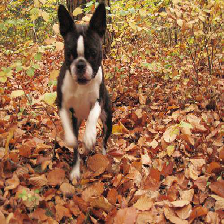

In [8]:

#checking an image
img = load_img(r"C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\train\000bec180eb18c7604dcecc8fe0dba07.jpg", target_size=(224,224))
img

In [9]:
# verifying the size of train image folder with their labels

if len(os.listdir(r"C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\train")) == len(labels['breed']):
    print("Number of files is identical to the number of labels.")
else:
    print("Number of files not matches to the number of image labels.")

Number of files is identical to the number of labels.


In [10]:
#Create list of alphabetically sorted labels.
classes = sorted(labels['breed'].unique().tolist())
n_classes = len(classes)
print(f'Total unique breed {n_classes}')

#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [12]:
train_dir = r'C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\train'
labels['img_path'] = train_dir + '/'+ labels['id'] + '.jpg'
labels.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                            img_path  
0  C:\Users\erpra\Documents\IITM-Advanced-Certifi...  
1  C:\Users\erpra\Documents\IITM-Advanced-Certifi...  
2  C:\Users\erpra\Documents\IITM-Advanced-Certifi...  
3  C:\Users\erpra\Documents\IITM-Advanced-Certifi...  
4  C:\Users\erpra\Documents\IITM-Advanced-Certifi...

In [13]:
target_size = (224,224,3)

def image_to_array(dataset, size = target_size):
    img_label = dataset['breed']
    images = np.zeros([len(dataset), size[0], size[1], size[2]],dtype=np.uint8)
    y = np.zeros([len(dataset),1],dtype = np.uint8)
    
    for index, img_path in enumerate(dataset['img_path'].values):
        img_dir = img_path
        img = load_img(img_dir, target_size = size)
        images[index] = img
        
        del img
        
        label_name = img_label[index]
        y[index] = class_to_num[label_name]
        
    y = to_categorical(y)
    
    return images, y

In [14]:
import time

t = time.time()
df_train = labels.iloc[0:1000,:] # slicing the datasets
print(f"Passing the dataset of shape: {df_train.shape}")

X, y = image_to_array(df_train)

print("Runtime in seconds: {}".format(time.time() - t))

Passing the dataset of shape: (1000, 3)
Runtime in seconds: 2.104031801223755


In [15]:
X.shape

(1000, 224, 224, 3)

In [16]:
lbl_indx = np.argmax(y[0])
unique = sorted(labels['breed'].unique())

print(unique[lbl_indx])

boston_bull


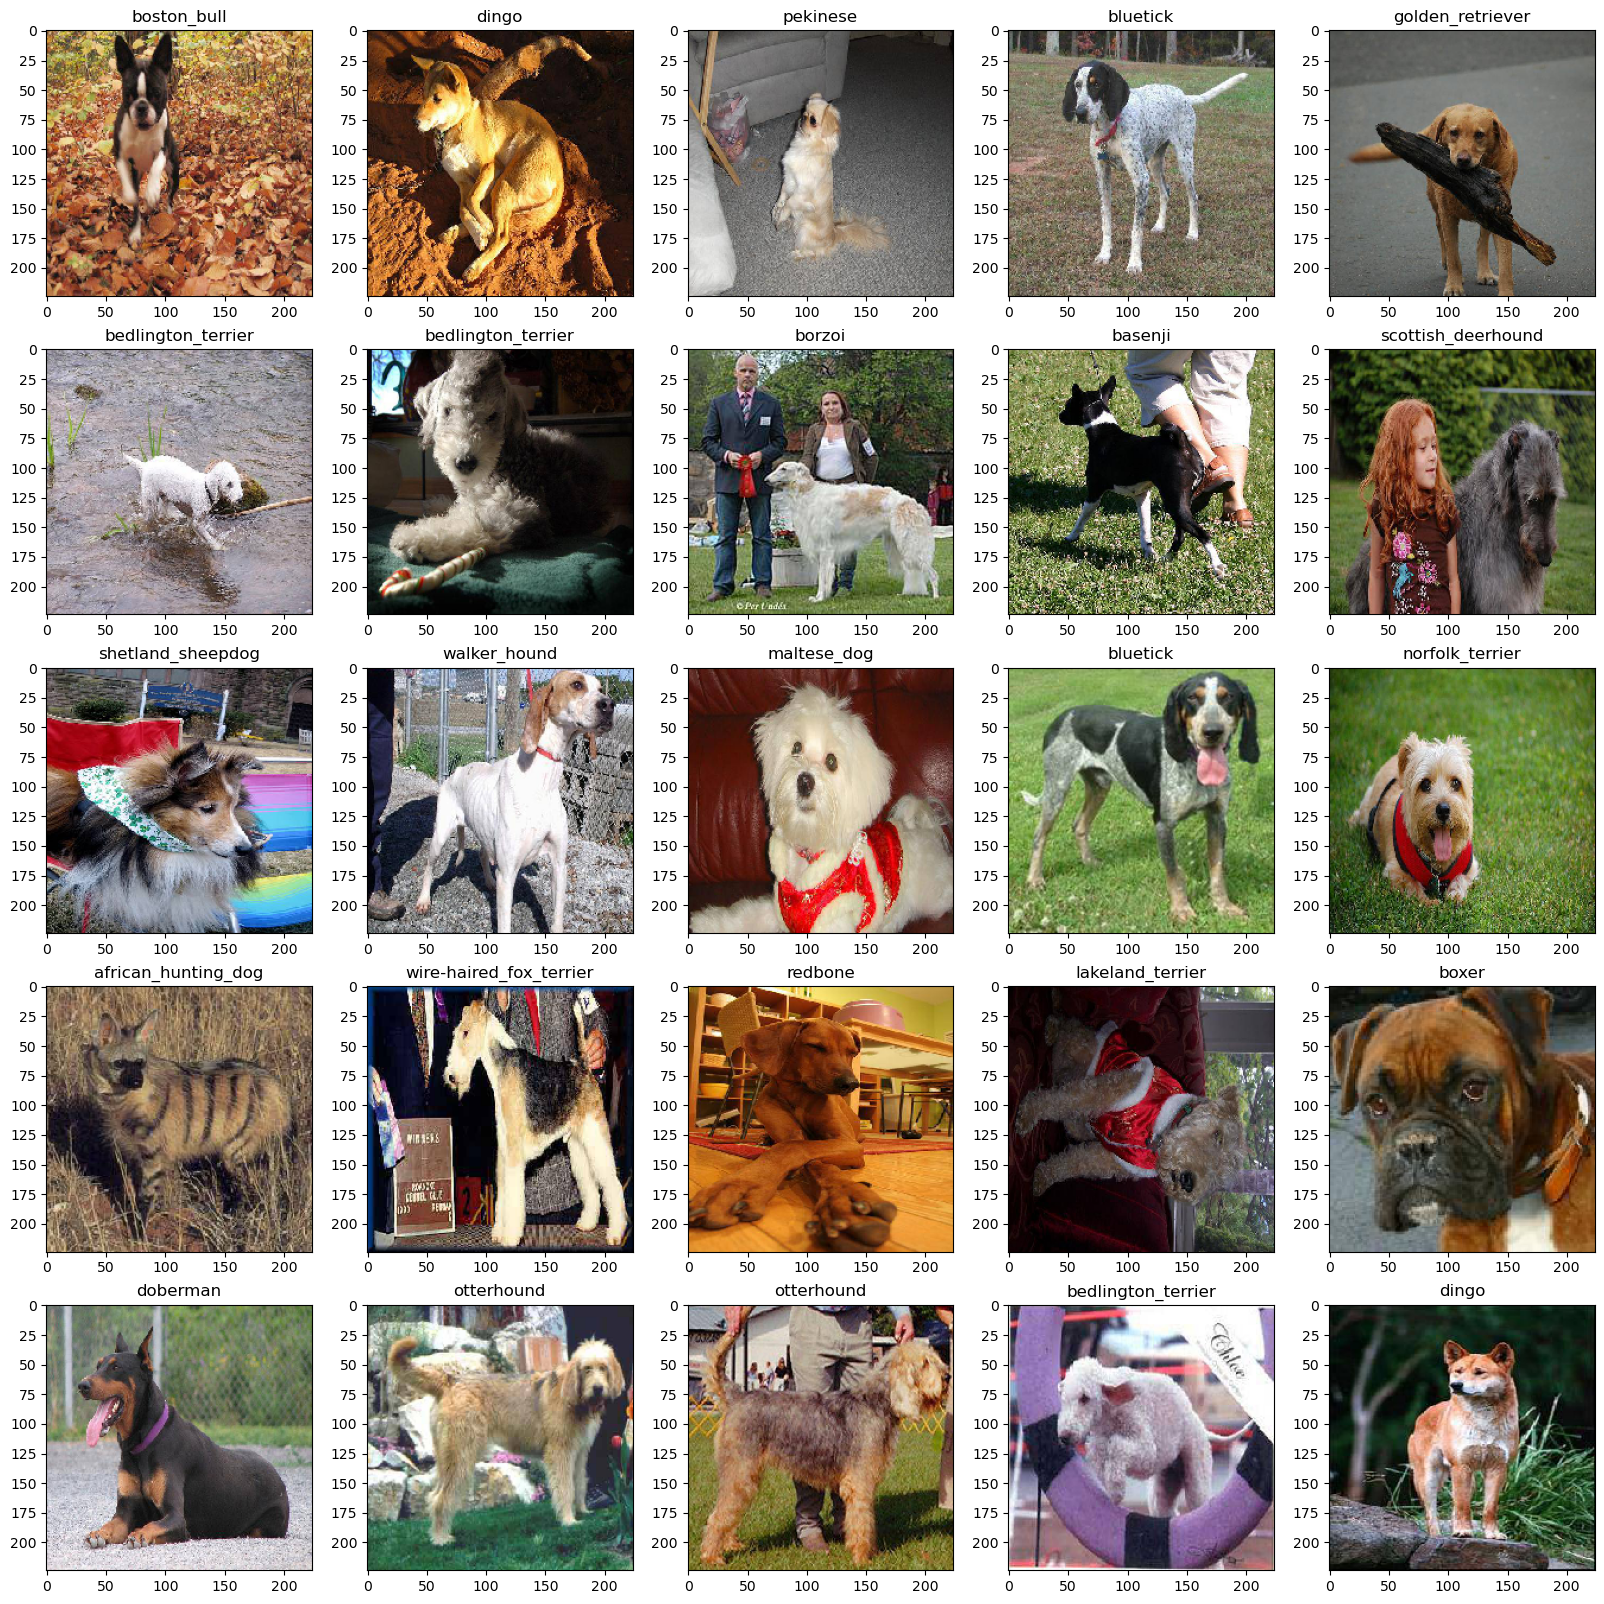

In [17]:
# visualizing the few dogs images


n = 25
plt.figure(figsize=(20,20))

for i in range(n):
    axes = plt.subplot(5,5,i+1)
    plt.title(classes[np.argmax(y[i])])
    plt.imshow(X[i])

In [18]:
# checking the classes at few index in 'y' column
classes[np.argmax(y[0])], classes[np.argmax(y[1])], classes[np.argmax(y[2])], classes[np.argmax(y[3])], classes[np.argmax(y[4])] 

('boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever')

In [19]:
labels['breed'].head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [20]:
dogbreed = labels['breed'][0]
y = class_to_num[dogbreed]
print(dogbreed)
y

boston_bull


19

# Preparing DATA to for the model training 

In [21]:
dir_train = r'C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\train'
dir_test = r'C:\Users\erpra\Documents\IITM-Advanced-Certification- in-DS-ML-AI\Assignment\AI_Assignment_Module 5\dog-breed-identification\test'

In [24]:
from os.path import join

train_img_fpaths = [join(dir_train, f) for f in os.listdir(dir_train)]
test_img_fpaths = [join(dir_test, f) for f in os.listdir(dir_test)]

train_size = len(train_img_fpaths)
test_size = len(test_img_fpaths)

[train_size,test_size]

[10222, 10357]

In [25]:
df_train = labels.iloc[:, 0:2]
df_train.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [26]:
len(df_train.breed.unique())

120

In [27]:
df_train.rename(columns = {"breed": "label"}, inplace = True)
df_train["id"] = df_train["id"].apply(lambda x: x+"."+"jpg")
df_train.head()

id             label
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever

In [28]:
test_files = os.listdir(dir_test)
df_test = pd.DataFrame({"id": test_files, "label": "boston_bull"})
df_test.head()

id        label
0  000621fb3cbb32d8935728e48679680e.jpg  boston_bull
1  00102ee9d8eb90812350685311fe5890.jpg  boston_bull
2  0012a730dfa437f5f3613fb75efcd4ce.jpg  boston_bull
3  001510bc8570bbeee98c8d80c8a95ec1.jpg  boston_bull
4  001a5f3114548acdefa3d4da05474c2e.jpg  boston_bull

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
train_generator = train_data_gen.flow_from_dataframe(df_train, dir_train, x_col = 'id', y_col = 'label', subset = 'training',
                                                     color_mode = 'rgb', class_mode = 'categorical', target_size = (224, 224),
                                                     batch_size = 32, shuffle = True, seed = 123)


Found 8178 validated image filenames belonging to 120 classes.


In [30]:
test_data_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
test_generator = test_data_generator.flow_from_dataframe(df_train, dir_train, x_col = 'id', y_col = 'label',
                                                              subset = 'validation', color_mode = 'rgb',
                                                              class_mode = 'categorical', target_size = (224, 224),
                                                              batch_size = 32, shuffle = True, seed = 123)

Found 2044 validated image filenames belonging to 120 classes.


In [32]:
# Define a list of model architectures and topologies
models = [
    tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(120, activation='softmax')
    ]),
    tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(120, activation='softmax')
    ])
]

In [33]:
models[0].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 394272)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               50466944  
                                                                 
 dense_5 (Dense)             (None, 120)               15480     
                                                                 
Total params: 50,483,320
Trainable params: 50,483,320
Non-trainable params: 0
__________________________________________

In [34]:
models[1].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Creating a TensorBoard callback using Adam optimizer

In [45]:
from tensorflow.keras.callbacks import TensorBoard

callbacks_list_adam = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs_adam')
]

In [46]:
# Iterate over the models with Adam optimizer
for i, model in enumerate(models):
    print(f'Experiment {i+1}')
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # Fit the model on the training data
    history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // 128,
                    epochs = 5,
                    callbacks = callbacks_list_adam,
                    validation_data = test_generator,
                    verbose = 1,
                    validation_steps = test_generator.samples // 128)
    
    # Save the metrics in a pandas dataframe
    result = pd.DataFrame(history.history)
    result['experiment'] = i + 1
    result.to_csv(f'experiment_{i+1}_results_ adam.csv', index=False)

# Save the final results in an Excel file
result.to_excel('experiment_results_adam.xlsx', index=False)

Experiment 1
Epoch 1/5
63/63 [==============================] - 29s 452ms/step - loss: 4.7841 - accuracy: 0.0084 - val_loss: 4.7823 - val_accuracy: 0.0167
Epoch 2/5
63/63 [==============================] - 29s 457ms/step - loss: 4.7875 - accuracy: 0.0104 - val_loss: 4.7842 - val_accuracy: 0.0104
Epoch 3/5
63/63 [==============================] - 29s 457ms/step - loss: 4.7833 - accuracy: 0.0129 - val_loss: 4.7835 - val_accuracy: 0.0083
Epoch 4/5
63/63 [==============================] - 28s 449ms/step - loss: 4.7815 - accuracy: 0.0140 - val_loss: 4.7858 - val_accuracy: 0.0042
Epoch 5/5
63/63 [==============================] - 26s 417ms/step - loss: 4.7825 - accuracy: 0.0124 - val_loss: 4.7852 - val_accuracy: 0.0083
Experiment 2
Epoch 1/5
63/63 [==============================] - 39s 618ms/step - loss: 3.9695 - accuracy: 0.2178 - val_loss: 4.8384 - val_accuracy: 0.0312
Epoch 2/5
63/63 [==============================] - 39s 612ms/step - loss: 3.4600 - accuracy: 0.3199 - val_loss: 4.8851 - v

# Creating a TensorBoard callback using SGD optimizer

In [47]:
callbacks_list_SGD = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs_sgd')
]

In [48]:
# Iterate over the models with SGD optimizer
for i, model in enumerate(models):
    print(f'Experiment {i+1}')
    # Compile the model
    opt = SGD()
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # Fit the model on the training data
    history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // 128,
                    epochs = 5,
                    callbacks = callbacks_list_SGD,
                    validation_data = test_generator,
                    verbose = 1,
                    validation_steps = test_generator.samples // 128)
    
    # Save the metrics in a pandas dataframe
    result = pd.DataFrame(history.history)
    result['experiment'] = i + 1
    result.to_csv(f'experiment_{i+1}_results_sgd.csv', index=False)

# Save the final results in an Excel file
result.to_excel('experiment_results_sgd.xlsx', index=False)

Experiment 1
Epoch 1/5
63/63 [==============================] - 25s 386ms/step - loss: 4.7825 - accuracy: 0.0064 - val_loss: 4.7831 - val_accuracy: 0.0146
Epoch 2/5
63/63 [==============================] - 24s 384ms/step - loss: 4.7808 - accuracy: 0.0079 - val_loss: 4.7838 - val_accuracy: 0.0125
Epoch 3/5
63/63 [==============================] - 24s 386ms/step - loss: 4.7790 - accuracy: 0.0089 - val_loss: 4.7804 - val_accuracy: 0.0146
Epoch 4/5
63/63 [==============================] - 25s 391ms/step - loss: 4.7820 - accuracy: 0.0119 - val_loss: 4.7828 - val_accuracy: 0.0146
Epoch 5/5
63/63 [==============================] - 26s 407ms/step - loss: 4.7785 - accuracy: 0.0129 - val_loss: 4.7856 - val_accuracy: 0.0188
Experiment 2
Epoch 1/5
63/63 [==============================] - 39s 614ms/step - loss: 1.6753 - accuracy: 0.7103 - val_loss: 5.7912 - val_accuracy: 0.0354
Epoch 2/5
63/63 [==============================] - 39s 615ms/step - loss: 1.5867 - accuracy: 0.7123 - val_loss: 5.9151 - v

# Creating VGG16 Pretrained Model

In [39]:
base_model = VGG16(weights = 'imagenet')

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
predictions = Dense(len(list(train_generator.class_indices.keys())), activation = 'softmax',
                    kernel_initializer = 'random_uniform')(x)

model = Model(inputs = base_model.input, outputs = predictions)

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=  'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

553467096/553467096 [==============================] - 81s 0us/step


In [40]:
callbacks_list_VGG = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs_VGG')
]

In [41]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // 128,
                    epochs = 10,
                    callbacks = callbacks_list_VGG,
                    validation_data = test_generator,
                    verbose = 1,
                    validation_steps = test_generator.samples // 128)

Epoch 1/10
63/63 [==============================] - 205s 3s/step - loss: 4.7873 - accuracy: 0.0144 - val_loss: 4.7872 - val_accuracy: 0.0104
Epoch 2/10
63/63 [==============================] - 207s 3s/step - loss: 4.7841 - accuracy: 0.0134 - val_loss: 4.7856 - val_accuracy: 0.0021
Epoch 3/10
63/63 [==============================] - 217s 3s/step - loss: 4.7824 - accuracy: 0.0104 - val_loss: 4.7849 - val_accuracy: 0.0063
Epoch 4/10
63/63 [==============================] - 226s 4s/step - loss: 4.7763 - accuracy: 0.0120 - val_loss: 4.7828 - val_accuracy: 0.0063
Epoch 5/10
63/63 [==============================] - 222s 4s/step - loss: 4.7716 - accuracy: 0.0114 - val_loss: 4.7756 - val_accuracy: 0.0125
Epoch 6/10
63/63 [==============================] - 223s 4s/step - loss: 4.7746 - accuracy: 0.0170 - val_loss: 4.7789 - val_accuracy: 0.0146
Epoch 7/10
63/63 [==============================] - 220s 4s/step - loss: 4.7661 - accuracy: 0.0115 - val_loss: 4.7785 - val_accuracy: 0.0125
Epoch 8/10
63

In [42]:
test_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_gen = test_data_gen.flow_from_dataframe(df_test, dir_test, x_col = 'id', y_col = 'label', color_mode = 'rgb',
                                                   class_mode = 'categorical', target_size = (224, 224), batch_size = 32, shuffle = False,
                                                   seed = 123)

Found 10357 validated image filenames belonging to 1 classes.


In [43]:
arr=model.predict(test_gen)
arr

324/324 [==============================] - 924s 3s/step


array([[0.00887656, 0.01119282, 0.01301514, ..., 0.0067937 , 0.0103374 ,
        0.00871499],
       [0.00920582, 0.01090599, 0.01407609, ..., 0.00629858, 0.01048501,
        0.00892987],
       [0.00914296, 0.01055057, 0.01234545, ..., 0.00711027, 0.01020931,
        0.00871628],
       ...,
       [0.0082575 , 0.01044383, 0.01091358, ..., 0.00782999, 0.00959677,
        0.00836206],
       [0.00915209, 0.01109823, 0.01328251, ..., 0.00659964, 0.0104223 ,
        0.00894355],
       [0.00873471, 0.01074807, 0.01190445, ..., 0.00734689, 0.01006102,
        0.00853887]], dtype=float32)

In [44]:
ar= arr.argmax(axis = -1)
ar

array([109, 109, 109, ...,  97, 109, 109], dtype=int64)